## CASE STUDY

# 1. Merge the datasets


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cust = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Customer.csv')              #importing thr datasets
trans = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Transactions.csv')
prod_cat = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/prod_cat_info.csv')

In [85]:
#cust.head()              #understanding the data
#trans.head()
#prod_cat.head() 
#cust.describe()
#trans.describe()


#trans.duplicated(subset=['transaction_id']) #some insights 

In [4]:
#print (trans.columns)
#print(cust.columns)
#print(prod_cat.columns)

cust.rename(columns = {'customer_Id' : 'cust_id'} , inplace = True)                               #fixing column names to make joins
prod_cat.rename(columns = {'prod_sub_cat_code' : 'prod_subcat_code'} , inplace = True)

#cust.head(2)
#prod_cat.head(2)

In [87]:
merged = trans.merge(cust,on = 'cust_id', how = 'left').merge(prod_cat,on = ['prod_cat_code', 'prod_subcat_code'],how = 'left')  #merged dataset with all the data,"join"
merged.head(2)                  
#merged.shape


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers


# 2. Check the duplicates if there are any duplicates drop them.


In [88]:
print("total duplicates in merged dataset:" ,merged.duplicated().sum())

total duplicates in merged dataset: 13


In [7]:
merged.describe()
print(merged.shape)
merged.drop_duplicates(keep = 'first', inplace = True) 
print(merged.shape)



(23053, 15)
(23040, 15)


# 3. Check for the null/missing values.


In [8]:
print(merged.shape)
print(merged.isnull().sum())        #checking for null values in dataset

(23040, 15)
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64


In [9]:
#dropping rows with null values
final = merged.dropna()
final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,Children


In [66]:
#merged['tran_date'] = pd.to_datetime(merged['tran_date'] )
#final['tran_date'] = pd.to_datetime(final['tran_date'] )
#final['DOB'] = pd.to_datetime(final['DOB'] )

# 4. Prepare summary report for all the columns.


In [10]:
final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [11]:
##Extracting possible Numerical columns
final.select_dtypes(include='number').columns.tolist()

['transaction_id',
 'cust_id',
 'prod_subcat_code',
 'prod_cat_code',
 'Qty',
 'Rate',
 'Tax',
 'total_amt',
 'city_code']

In [12]:
##Extracting possible Categorical columns
final.select_dtypes(include='object').columns.tolist()

['tran_date', 'Store_type', 'DOB', 'Gender', 'prod_cat', 'prod_subcat']

### Summary

In [13]:
#Transaction id : has numerical values but will not be considered as numerical , its a high volume categorical variable which can be used to link product returns to buying
#in most of the analysis it is considered unique

In [14]:
#cust_id : unique values linked to a single customer

In [15]:
#prod_subcat_code : categorical variable which is converted to numerical which is linked to the product "subcategory" information

In [16]:
#prod_cat_code : categorical variable which is converted to numerical which is linked to the product "category" information

In [17]:
#prod_subcat : categorical variable with string values linked to the product "subcategory".

In [18]:
#prod_cat : categorical variable with string values linked to the product "category".

In [19]:
#gender : gender of customer ids M/F

In [20]:
#Store_type : store from which products were bought by the customers

In [21]:
#tran_date : date the transaction occured

In [22]:
#dob : date of birth of the customers for unique cust ids

<AxesSubplot:ylabel='Frequency'>

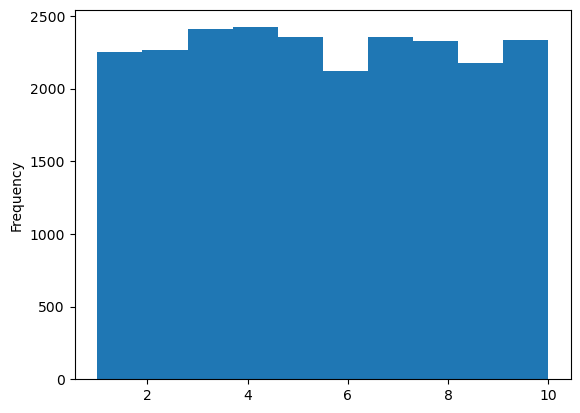

In [23]:
#city code : denotes city from which customer is 
final['city_code'].describe
final['city_code'].plot(kind='hist' , bins = 10)

#city_code 4 has most number of people

<AxesSubplot:ylabel='Frequency'>

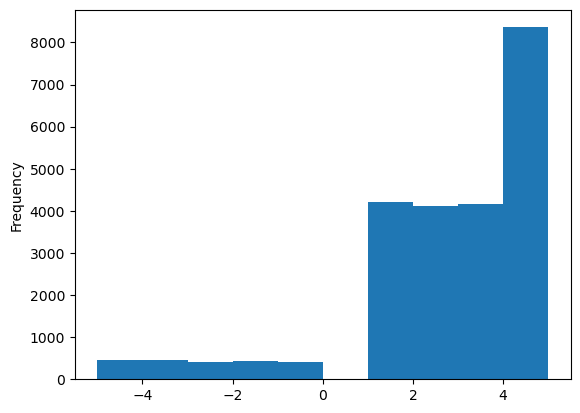

In [24]:
final['Qty'].plot(kind='hist')
#Quantity of products bought or sold in each transaction
#max = 4

Text(0, 0.5, 'Transactions')

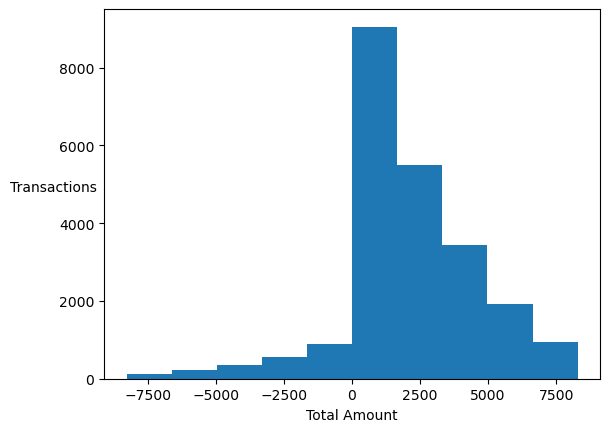

In [25]:
final['total_amt'].plot(kind = 'hist')
plt.xlabel('Total Amount')
plt.ylabel('Transactions' , rotation = 0)
# total amount: Total sales/returning amount including tax 
# most sales in the given timeframe were in the medium ticket category

Text(0, 0.5, 'Transactions')

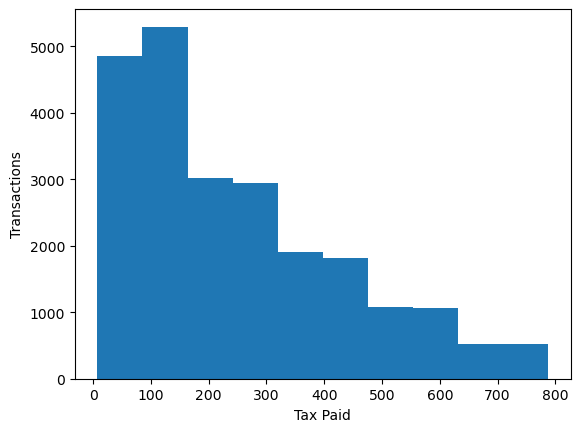

In [26]:
final['Tax'].plot(kind = 'hist')
plt.xlabel('Tax Paid')
plt.ylabel('Transactions' , rotation = 90)
# tax paid on purchases including the (+ - )
#10k+ transactions , the tax didnt go above 150 

Text(0, 0.5, 'Transactions')

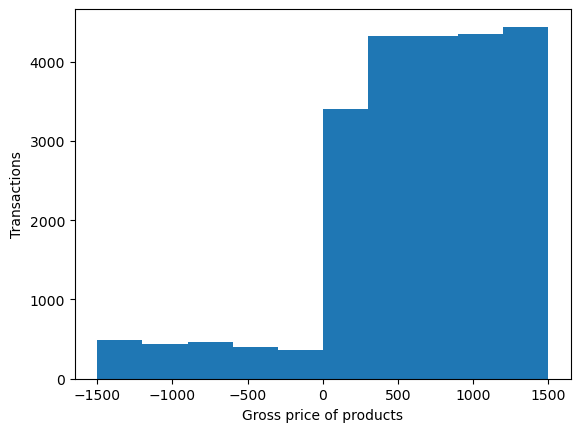

In [27]:
final['Rate'].plot(kind = 'hist')
plt.xlabel('Gross price of products')
plt.ylabel('Transactions' , rotation = 90)

# 5. Find the percentage of products bought by men and women(clothes).

In [28]:
clothes = final.loc[final["prod_cat_code"] == (1), ['Gender']]
clothes.shape

(2957, 1)

In [29]:
Gen_counts= clothes["Gender"].value_counts()

In [30]:
print(Gen_counts)
Gender_per = Gen_counts *100/( clothes.shape[0] )
print(Gender_per)


M    1518
F    1439
Name: Gender, dtype: int64
M    51.335813
F    48.664187
Name: Gender, dtype: float64


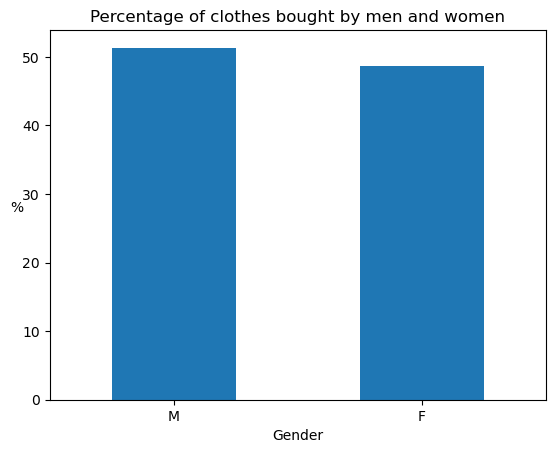

In [31]:
Gender_per.plot.bar()
plt.xlabel('Gender')
plt.ylabel('%' , rotation = 0)
plt.xticks(rotation = 0)
plt.title('Percentage of clothes bought by men and women')
plt.show()

# 6. Find the percentage of products bought by men and women(footwear).

In [32]:
footwear = final.loc[final["prod_cat_code"] == (2), ['Gender']]

In [33]:
Gen_counts= footwear["Gender"].value_counts()
print(Gen_counts)
Gender_per = Gen_counts *100/( footwear.shape[0] )
print(Gender_per)

F    1528
M    1467
Name: Gender, dtype: int64
F    51.018364
M    48.981636
Name: Gender, dtype: float64


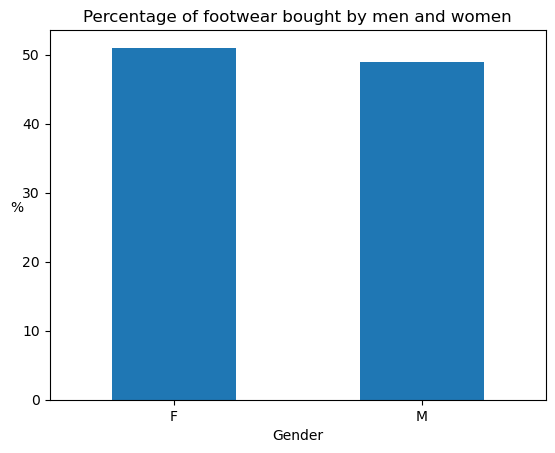

In [34]:
Gender_per.plot.bar()
plt.xlabel('Gender')
plt.ylabel('%' , rotation = 0)
plt.xticks(rotation = 0)
plt.title('Percentage of footwear bought by men and women')
plt.show()

# 7. How many types of stores are there,and which type ofstores sells maximum of products?

In [35]:
stores_count = final["Store_type"].value_counts()

In [36]:
stores_count

e-Shop            9299
MBR               4658
Flagship store    4573
TeleShop          4493
Name: Store_type, dtype: int64

e-shop sells maximum products

In [37]:
stores_cper = stores_count *100 / final.shape[0]
stores_cper

e-Shop            40.390045
MBR               20.231942
Flagship store    19.862746
TeleShop          19.515267
Name: Store_type, dtype: float64

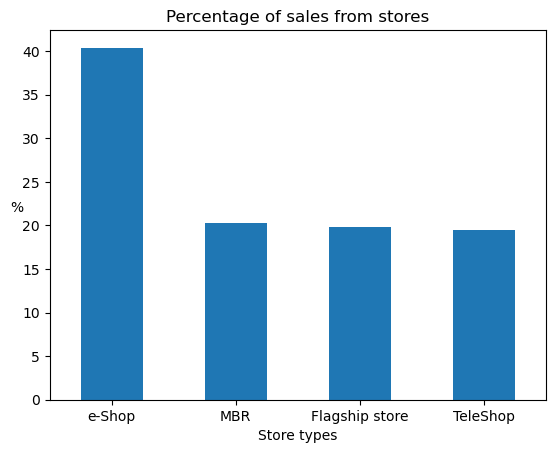

In [38]:
stores_cper.plot.bar()
plt.xlabel('Store types')
plt.ylabel('%' , rotation = 0)
plt.xticks(rotation = 0)
plt.title('Percentage of sales from stores')
plt.show()

# 8. Which type of book is selling the most?

In [39]:
books = final.loc[final["prod_cat_code"] == 5, ['prod_subcat']]

In [40]:
books.value_counts()

prod_subcat
Fiction        1042
Children       1034
Comics         1030
Non-Fiction    1001
DIY             988
Academic        966
dtype: int64

In [41]:
books_per = books.value_counts() *100 / books.shape[0]
books_per

prod_subcat
Fiction        17.191883
Children       17.059891
Comics         16.993895
Non-Fiction    16.515426
DIY            16.300940
Academic       15.937964
dtype: float64

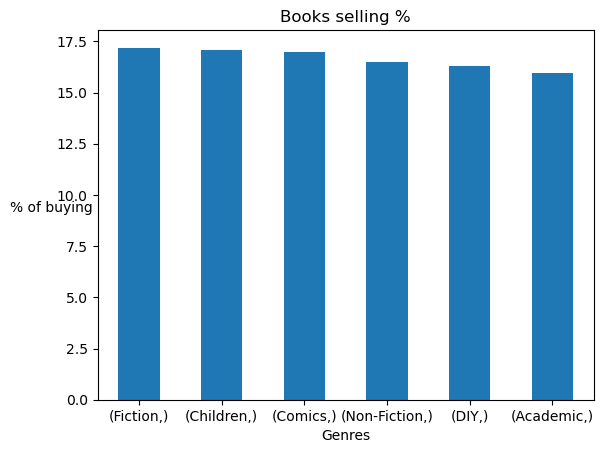

In [42]:
books_per.plot.bar()
plt.xlabel('Genres')
plt.ylabel('% of buying' , rotation = 0)
plt.xticks(rotation = 0)
plt.title('Books selling %')
plt.show()

# 9. What is the total amount spent by men on electronics?

In [43]:
Male_total = final[(final['Gender'] == 'M')]
Electronics_Male_total = Male_total[(Male_total['prod_cat'] == 'Electronics')].total_amt.sum()
print("Total amount spent by men on electronics is {:.2f}".format(Electronics_Male_total))

Total amount spent by men on electronics is 5705871.92


# 10. What is the total amount spent by women on clothing?

In [44]:
Female_total = final[(final['Gender'] == 'F')]
Clothing_Female = final[(final['prod_cat'] == 'Clothing')].total_amt.sum()

print("Total amount spent by women on clothing is {:.2f}".format(Clothing_Female))

Total amount spent by women on clothing is 6250830.30


# 11. What is the total amount spent on furnishings?

In [45]:
Furnishings_total = final[(final['prod_subcat'] == 'Furnishing')].total_amt.sum()

print("Total amount spent on furnishings is {:.2f}".format(Furnishings_total))

Total amount spent on furnishings is 2097940.84


# 12. Who reads books more (Men/Women)?

In [89]:
Male_books = Male_total[(Male_total['prod_cat'] == 'Books')]
Female_books = Female_total[(Female_total['prod_cat'] == 'Books')]



if len(Male_books) == len(Female_books):
  print("Equal number of men and women read books")

elif  len(Male_books) > len(Female_books):
  print("Number of men reading books are more than women")

else:
  print("Number of women reading books are more than men")


Number of men reading books are more than women


# 13. Which type of books men read more?

In [90]:
df1= Male_books[(Male_books['prod_cat'] == 'Books')].groupby(['prod_subcat'])['prod_subcat'].count()
df = dict(df1)

#Finding the sub category with maximum value and printing it
max_books_male = list(df.keys())[list(df.values()).index(max(df.values()))]

print("Type of books men read more is", max_books_male)
df

Type of books men read more is Fiction


{'Academic': 449,
 'Children': 553,
 'Comics': 546,
 'DIY': 504,
 'Fiction': 557,
 'Non-Fiction': 506}

# 14. Which type of books women read more?

In [48]:
df2= Female_books[(Female_books['prod_cat'] == 'Books')].groupby(['prod_subcat'])['prod_subcat'].count()
df = dict(df2)

#Finding the sub category with maximum value and printing it
max_books_female = list(df.keys())[list(df.values()).index(max(df.values()))]

print("Type of books women read more is", max_books_female)
df

Type of books women read more is Academic


{'Academic': 517,
 'Children': 481,
 'Comics': 484,
 'DIY': 484,
 'Fiction': 485,
 'Non-Fiction': 495}

# 15. Which electronic good is selling the most?

In [49]:
df3 = final[(final['prod_cat'] == "Electronics")].groupby(['prod_subcat'])['prod_subcat'].count()
df = dict(df3)

#Finding the sub category with maximum value and printing it
max_electronics = list(df.keys())[list(df.values()).index(max(df.values()))]

print("Electronic good that is selling the most is ", max_electronics)
df3

Electronic good that is selling the most is  Mobiles


prod_subcat
Audio and video         951
Cameras                 984
Computers               956
Mobiles                1030
Personal Appliances     970
Name: prod_subcat, dtype: int64

# 16. What is the total amount spent by customers between 1st January 2012 and 31st December 2012?


In [54]:
import dateutil.parser as parser
  
# Now parsing the "10-09-2021" datetime with
# dayfirst parameter
A = parser.parse("01-01-2012", dayfirst = True)
B = parser.parse("31-12-2012", dayfirst = True)

Dates_amount= final[(final['tran_date'] > A) & (final['tran_date'] < B)].total_amt.sum()

print("Total amount spent by customers between 1st January 2012 and 31st December 2012 is {:.2f}".format(Dates_amount))

Total amount spent by customers between 1st January 2012 and 31st December 2012 is 15851513.40


# 17. Calculate the following information using the merged data. Time period of the available transaction data.

In [55]:

time_period = max(merged['tran_date']) - min(merged['tran_date'])

print("Time period of the available transaction data is", time_period.days, "days.")

Time period of the available transaction data is 1430 days.


# 18. Count of transactions where the total amount of transaction was negative.

In [56]:
negative_ta = merged[(merged['total_amt'] < 0)]
print("Count of transactions where the total amount of transaction was negative is", len(negative_ta) )

Count of transactions where the total amount of transaction was negative is 2164


# Visualisations

## Continous Variable


In [57]:
continous = final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]


In [58]:
continous.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

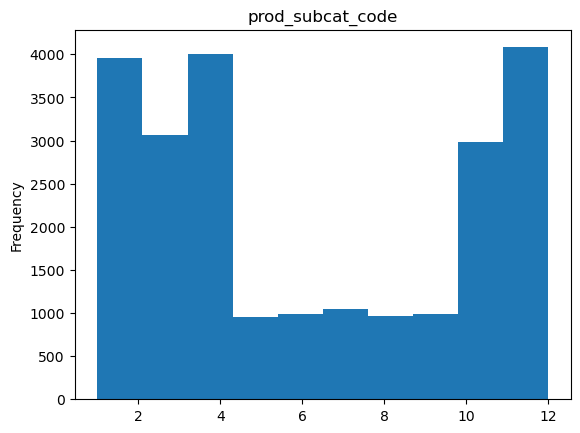

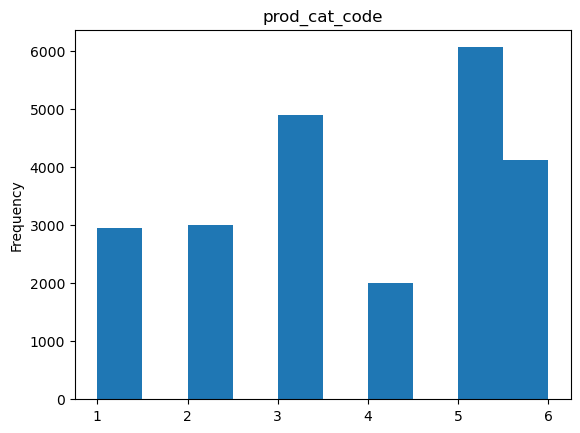

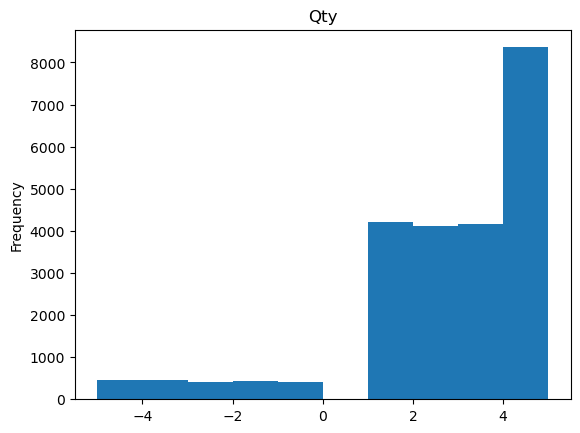

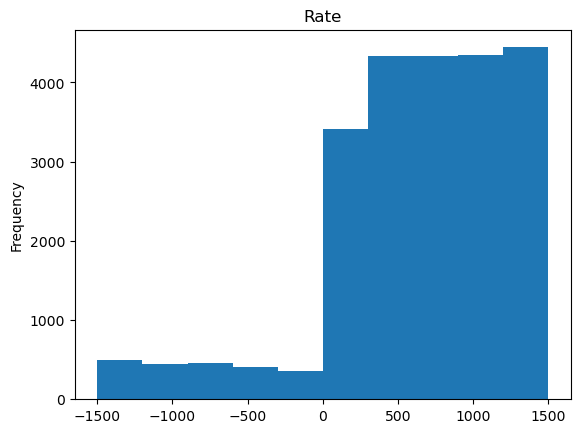

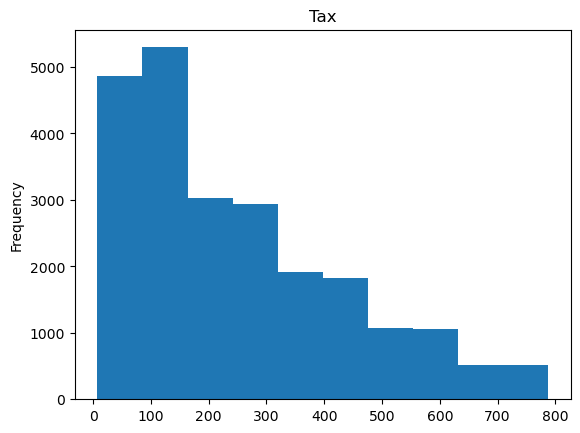

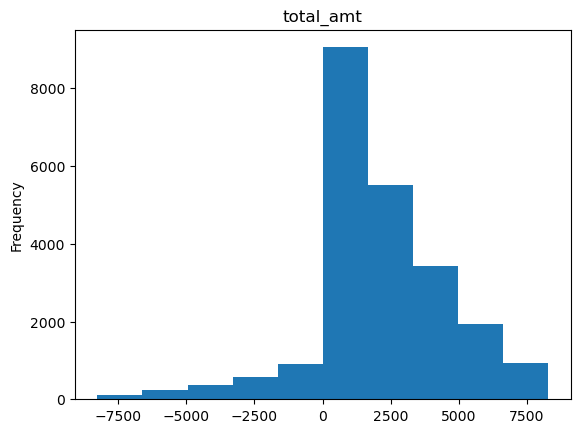

In [60]:
for i in continous.columns:
    continous[i].plot(kind='hist')
    plt.title(i)
    plt.show()


## Categorical Variables

In [67]:
category = final.loc[:,final.dtypes=='object']
category

,Store_type,Gender,prod_cat,prod_subcat
0,e-Shop,M,Clothing,Women
1,e-Shop,F,Electronics,Computers
2,TeleShop,M,Books,DIY
3,e-Shop,M,Home and kitchen,Bath
4,TeleShop,M,Books,DIY
...,...,...,...,...
23048,e-Shop,M,Books,Academic
23049,e-Shop,M,Clothing,Mens
23050,MBR,M,Home and kitchen,Furnishing
23051,TeleShop,M,Books,Children


/Users/priyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

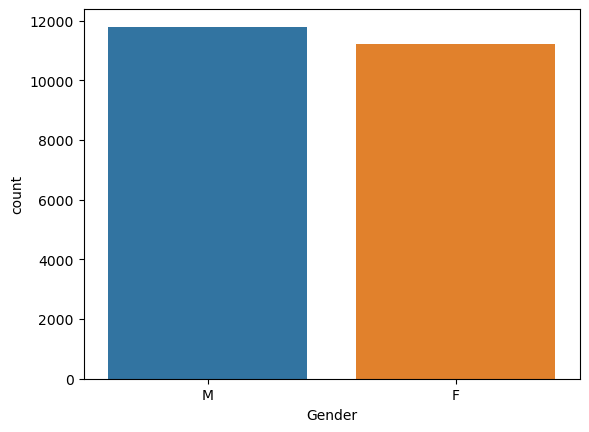

In [68]:
sns.countplot(category['Gender'])

/Users/priyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Product category')

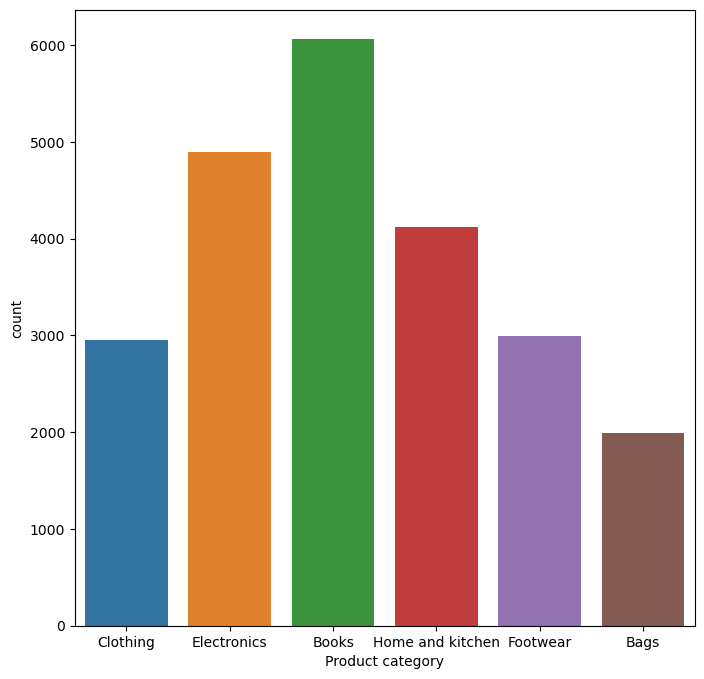

In [75]:
plt.figure(figsize=(8,8))
sns.countplot(category['prod_cat'])
plt.xlabel('Product category')

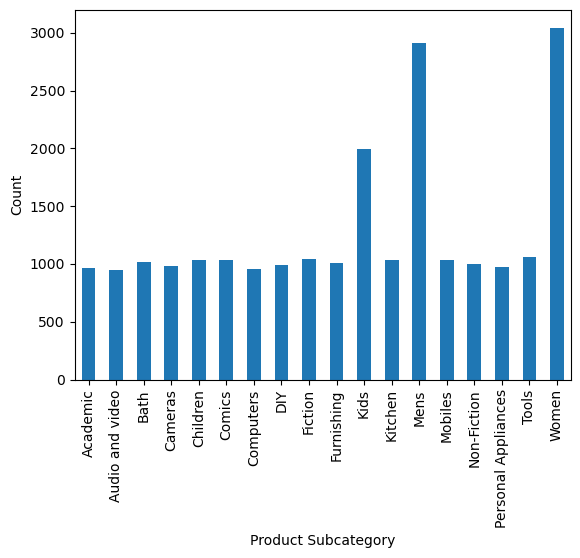

In [74]:
category.groupby('prod_subcat')['prod_subcat'].count().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Product Subcategory')
plt.show()


# Stats Questions

In [76]:
#Q1.
total_events = 6*6
events_sum_to_4 = 3
# (1,3),(3,1),(2,2)

prob = events_sum_to_4 / total_events
print("Probability of getting scores that sum to 4 =",prob)

# to 8
events_sum_to_8 = 5
# (4,4),(6,2),(2,6),(5,3),(3,5)

prob = events_sum_to_8 / total_events
print("Probability of getting scores that sum to 8 =",prob)

Probability of getting scores that sum to 4 = 0.08333333333333333
Probability of getting scores that sum to 8 = 0.1388888888888889


In [77]:
#Q2.
from scipy.stats import norm

mean = 80
std_dev = 10
dbp = 70

# calculate the z-score
z_score = (dbp - mean) / std_dev

# calculate the probability using the CDF
prob = norm.cdf(z_score)

print("The probability of a DBP less than 70 is:",prob)

The probability of a DBP less than 70 is: 0.15865525393145707


In [78]:
#Q3.
import scipy.stats as stats
import math

# Sample information
sample_mean = 1100
sample_std = 30
sample_size = 9

# Degrees of freedom
df = sample_size - 1

# Calculate the t-value for 95% confidence level and df=8
t_value = stats.t.ppf(0.975, df)

# Calculate the standard error of the mean
standard_error = sample_std / math.sqrt(sample_size)

# Calculate the confidence interval
lower = sample_mean - t_value * standard_error
upper = sample_mean + t_value * standard_error

print("95% Student's t confidence interval for the mean brain volume is between",lower,"&",upper)


95% Student's t confidence interval for the mean brain volume is between 1076.9399586496663 & 1123.0600413503337


In [79]:
#Q4.
import numpy as np
from scipy.stats import t

# sample statistics
n = 14
x_bar = 17.85
s = 1.955
mu = 18.5

# calculate the t-value
se = s / np.sqrt(n)
t_value = (x_bar - mu) / se

# calculate the p-value for a two-tailed test
df = n - 1
p_value = 2 * t.cdf(-np.abs(t_value), df)

# print the results
print(f"t-value: {t_value:.3f}")
print(f"p-value: {p_value:.3f}")

# check if the result is significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The result is significant.")
else:
    print("The result is not significant.")


t-value: -1.244
p-value: 0.235
The result is not significant.


In [80]:
#Q5
import math
from scipy.stats import t

# sample statistics
n = 25
x_bar = 22.6
s = 3
mu = 21

# calculate the t statistic
t_stat = (x_bar - mu) / (s / math.sqrt(n))

# find the p-value
p_val = 2 * (1 - t.cdf(abs(t_stat), n - 1))

# set the significance level
alpha = 0.05

# compare the p-value to the significance level
if p_val < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



Reject the null hypothesis


In [81]:
#Q6.
# total number of people
n = 200

# number of people with O blood type
o = 70

# probability of a person having O blood type
p_o = o / n

print("The probability of a person having O blood type is:", p_o)

The probability of a person having O blood type is: 0.35


In [82]:
#Q7.
# total number of discs
n = 90

# number of two-digit numbered discs
two_digit = 81

# number of perfect square numbered discs
perfect_squares = 9

# number of discs that are multiples of 5
multiples_of_5 = 18

# number of discs numbered divisible by 3 and 5
divisible_by_3_and_5 = 6

# probability of drawing a two-digit numbered disc
p_two_digit = two_digit / n
print("The probability of drawing a two-digit numbered disc is:", p_two_digit)

# probability of drawing a perfect square numbered disc
p_perfect_square = perfect_squares / n
print("The probability of drawing a perfect square numbered disc is:", p_perfect_square)

# probability of drawing a disc that is a multiple of 5
p_multiples_of_5 = multiples_of_5 / n
print("The probability of drawing a disc that is a multiple of 5 is:", p_multiples_of_5)

# probability of drawing a disc numbered divisible by 3 and 5
p_divisible_by_3_and_5 = divisible_by_3_and_5 / n
print("The probability of drawing a disc numbered divisible by 3 and 5 is:", p_divisible_by_3_and_5)


The probability of drawing a two-digit numbered disc is: 0.9
The probability of drawing a perfect square numbered disc is: 0.1
The probability of drawing a disc that is a multiple of 5 is: 0.2
The probability of drawing a disc numbered divisible by 3 and 5 is: 0.06666666666666667


In [83]:
#Q8.
from scipy.stats import chi2_contingency

# observed number of seeds for each component
observed = [184, 145, 100, 63, 63]

# expected number of seeds for each component based on the distribution indicated on the package
total = sum(observed)
expected = [total * 0.35, total * 0.25, total * 0.2, total * 0.1, total * 0.1]

# perform the chi-squared goodness-of-fit test
chi_squared, p_value = chi2_contingency([observed, expected], correction=False)[0:2]

# determine if the null hypothesis is rejected or not
alpha = 0.1
if p_value < alpha:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is not rejected.")


The null hypothesis is not rejected.
